In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/home/inventor/Datasets/California House Price/Cal_house/housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.shape

(20640, 10)

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
# Change the datatypes

df["housing_median_age"] = df["housing_median_age"].astype("int64")
df["total_bedrooms"] = df["total_bedrooms"].astype("int64")
df["total_rooms"] = df["total_rooms"].astype("int64")
df["population"] = df["population"].astype("int64")
df["households"] = df["households"].astype("int64")
df["median_house_value"] = df["median_house_value"].astype("int64")

In [12]:
num_cols = [feature for feature in df.columns if df[feature].dtypes in ["float64", "int64"]]
cat_cols = [feature for feature in df.columns if df[feature].dtypes not in ["float64", "int64"]]

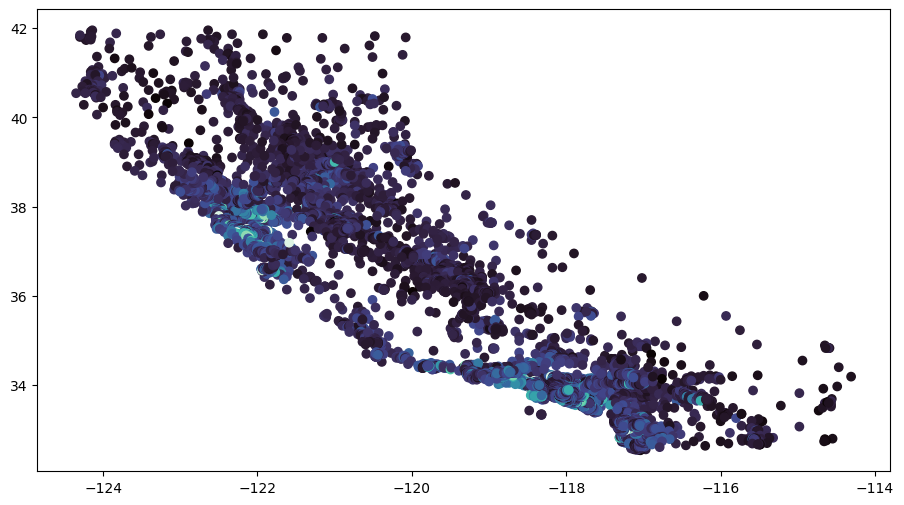

In [13]:
plt.figure(figsize=(11, 6))
plt.scatter(df["longitude"], df["latitude"], c=df["median_income"], cmap=sns.color_palette("mako", as_cmap=True))
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY


In [15]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop="first", dtype=np.int64)

encoded = encoder.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))

encoded_df = pd.concat([df, encoded_df], axis=1)

encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,NEAR BAY,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY,0,0,1,0


In [16]:
encoded_df.drop("ocean_proximity", axis=1, inplace=True)

In [17]:
encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,0,0,1,0


In [18]:
encoded_df.rename(columns={"median_house_value": "house_price"}, inplace=True)

In [19]:
encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_price,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975207,-0.974429,-0.977033,2.344766,2.129631,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.355109,0.861439,1.669961,2.332238,1.314156,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829711,-0.820777,-0.843637,1.782699,1.258693,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722378,-0.766028,-0.733781,0.932968,1.165100,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615046,-0.759847,-0.629157,-0.012881,1.172900,0,0,1,0


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("house_price", axis=1), encoded_df["house_price"], test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)

lasso.fit(X_train, y_train)

y_pred_sk = lasso.predict(X_test)

In [22]:
lasso.coef_, lasso.n_iter_

(array([-0.2514294 , -0.25269606,  0.11666446, -0.        ,  0.243828  ,
        -0.28926951,  0.09517728,  0.62320835, -0.46205554,  0.        ,
         0.        ,  0.        ]),
 143)

(array([1., 3., 0., 0., 4., 2., 1., 0., 0., 1.]),
 array([-0.46205554, -0.35352916, -0.24500277, -0.13647638, -0.02794999,
         0.0805764 ,  0.18910279,  0.29762918,  0.40615557,  0.51468196,
         0.62320835]),
 <BarContainer object of 10 artists>)

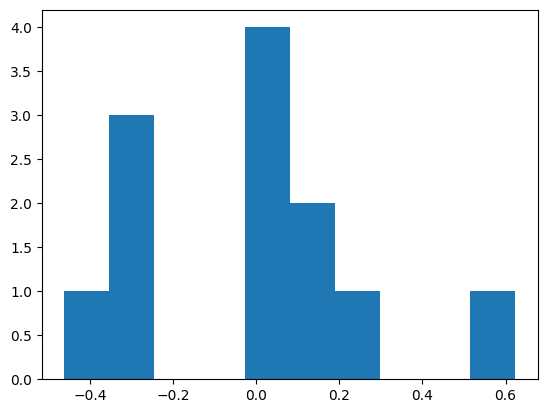

In [23]:
plt.hist(lasso.coef_)

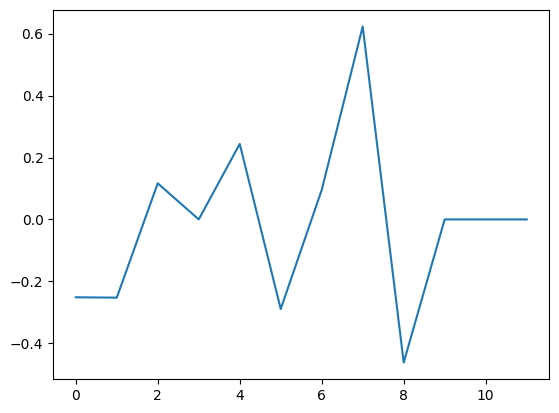

In [24]:
plt.plot(lasso.coef_)

In [25]:
from sklearn.metrics import r2_score

r2_score_sk = r2_score(y_test, y_pred_sk)

r2_score_sk

0.6213587163763639

In [26]:
learning_rate = []
coef_ = []
epochs = []

class Lasso_gradient():

    def __init__(self, learning_rate, epochs, alpha):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            y_hat = np.dot(X_train, self.coef_)

            coef_slope = np.dot(X_train.T, X_train).dot(self.coef_) - np.dot(y_train.T, X_train) + np.dot(self.alpha, np.sign(self.coef_))

            self.coef_ = self.coef_ - (self.lr * coef_slope)

            learning_rate.append(self.lr)
            epochs.append(i)

        coef_.append(self.coef_)
        print(f"Coef_: {self.coef_}")

        

    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = np.dot(X_test, self.coef_)
        return y_pred


In [27]:
lasso_g = Lasso_gradient(learning_rate=0.000001, epochs=900, alpha=0.01)

In [28]:
lasso_g.fit(X_train, y_train)

Coef_: [ 0.1203159  -0.26412372 -0.27296504  0.12296908 -0.01089112  0.20706277
 -0.32581012  0.18193634  0.63229443 -0.44774886  0.02254865  0.06039364
  0.10228412]


In [29]:
y_pred = lasso_g.predict(X_test)

In [30]:
r2_score(y_test, y_pred)

0.6257750641522686

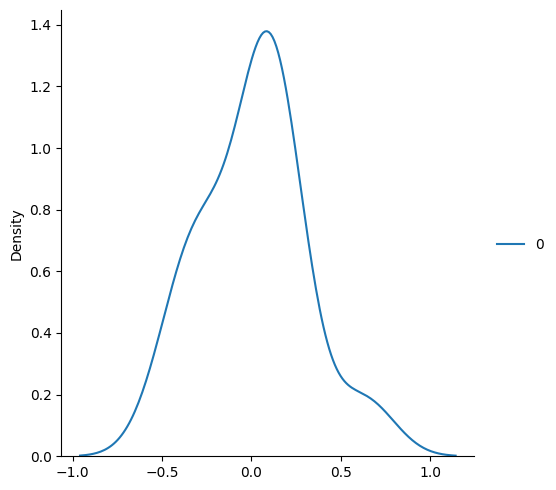

In [31]:
sns.displot(coef_, kind="kde")

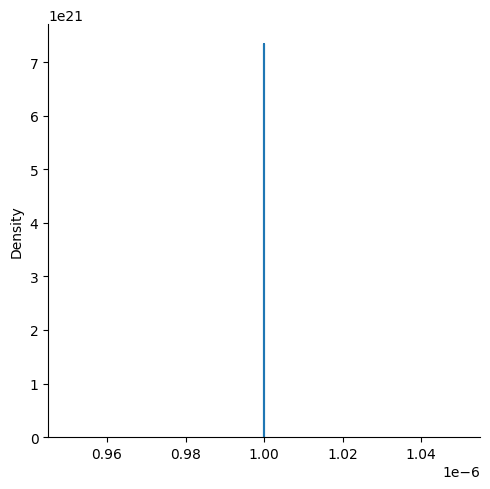

In [32]:
sns.displot(learning_rate, kind="kde")

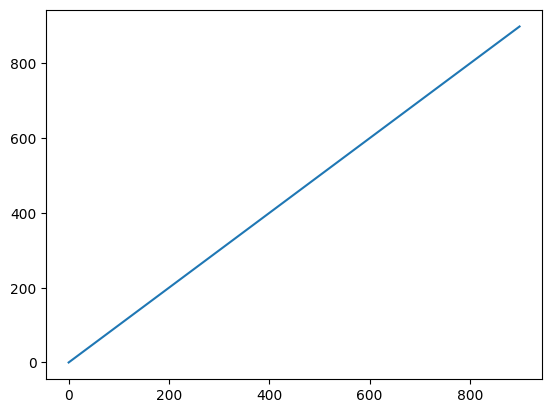

In [33]:
plt.plot(epochs)

<Axes: ylabel='Proportion'>

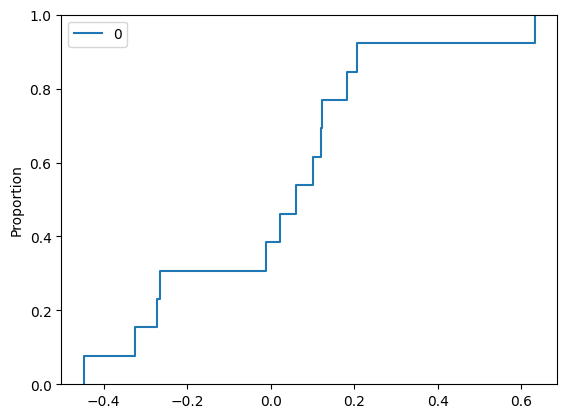

In [35]:
sns.ecdfplot(coef_)